<a href="https://colab.research.google.com/github/MohammedAsikHussain/Sentiment-Analysis/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/refs/heads/main/twitter_training.csv")
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']
df

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df.shape

(74681, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet_Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df['Tweet_Content'] = df['Tweet_Content'].astype(str)

In [6]:
print(df.isnull().sum())

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64


In [7]:
# fill null values
df['Tweet_Content'] = df['Tweet_Content'].fillna(lambda: 'CustomValue')

In [8]:
print(df.isnull().sum())

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64


In [9]:
df = df.drop(['Tweet_ID', 'Entity'], axis=1)
df.head()

,Sentiment,Tweet_Content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [10]:
# replacing Irrelevant to Neutral

df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

In [11]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [12]:
# Lower casing:
df['Tweet_Content']=df['Tweet_Content'].str.lower()
df.head()

,Sentiment,Tweet_Content
0,Positive,i am coming to the borders and i will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [13]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
stemmer = PorterStemmer()

In [15]:
def stemming(text):
    stemmed_words = re.sub('[^a-zA-Z]', ' ', text)
    stemmed_words = stemmed_words.split()
    stemmed_words = [stemmer.stem(word) for word in stemmed_words if word not in stopwords.words('english')]
    stemmed_words = ' '.join(stemmed_words)
    return stemmed_words



In [16]:
df['Tweet_Content'] = df['Tweet_Content'].apply(stemming)
df.head()

,Sentiment,Tweet_Content
0,Positive,come border kill
1,Positive,im get borderland kill
2,Positive,im come borderland murder
3,Positive,im get borderland murder
4,Positive,im get borderland murder


<ipython-input-17-a40cc96414a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


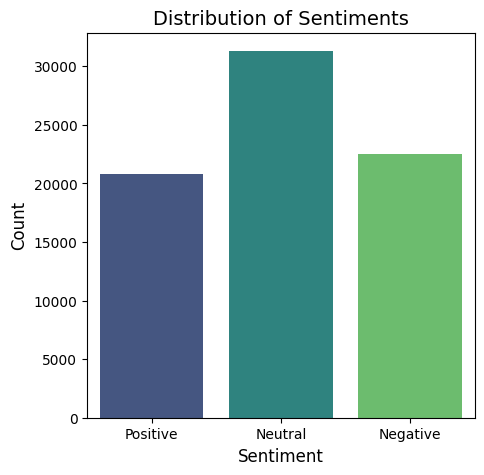

In [17]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment', data=df, palette='viridis')

plt.title('Distribution of Sentiments', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

In [18]:
df['Sentiment'].value_counts()

,count
Sentiment,
Neutral,31308
Negative,22542
Positive,20831


In [19]:
df["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [20]:
le = preprocessing.LabelEncoder()
df["Sentiment"] = le.fit_transform(df["Sentiment"])
df["Sentiment"].unique()

array([2, 1, 0])


0 - Negative
1 - Neutral
2 - Positive

In [21]:
# separate lables

X = df["Tweet_Content"]
Y = df["Sentiment"]

In [22]:
print(X)

0                                         come border kill
1                                   im get borderland kill
2                                im come borderland murder
3                                 im get borderland murder
4                                 im get borderland murder
                               ...                        
74676    realiz window partit mac like year behind nvid...
74677    realiz mac window partit year behind nvidia dr...
74678    realiz window partit mac year behind nvidia dr...
74679    realiz window partit mac like year behind nvid...
74680    like window partit mac like year behind driver...
Name: Tweet_Content, Length: 74681, dtype: object


In [23]:
# Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify = Y , random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(74681,) (59744,) (14937,)


In [26]:
# converting text data to numeric data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [27]:
print(X_train)

  (0, 4804)	0.1861140282835007
  (0, 10557)	0.17143578068360324
  (0, 15529)	0.2533937354037481
  (0, 16998)	0.18869223135866653
  (0, 11533)	0.4392834181270656
  (0, 16180)	0.2254267160220253
  (0, 13561)	0.15195454236290334
  (0, 14227)	0.19003170850853238
  (0, 6487)	0.22923995127367186
  (0, 4916)	0.21229782873950015
  (0, 6803)	0.21160697137912152
  (0, 3689)	0.21537367026033666
  (0, 8329)	0.19303371330658578
  (0, 16994)	0.19545269541181667
  (0, 6235)	0.1687310485539981
  (0, 4782)	0.215981685507238
  (0, 9984)	0.16309938510236546
  (0, 3225)	0.23524660582838644
  (0, 13113)	0.2692834096043431
  (0, 4771)	0.19835884733002665
  (1, 6803)	0.14986038754872852
  (1, 5696)	0.255117264535279
  (1, 713)	0.2989072220362358
  (1, 10344)	0.2539341919043667
  (1, 14813)	0.31798569959878514
  :	:
  (59742, 13827)	0.1774890841805492
  (59742, 7142)	0.2639678895236174
  (59742, 14374)	0.25353075530185615
  (59742, 1238)	0.25267979373228816
  (59742, 20675)	0.3155801988067589
  (59742, 11061)

# Train the model

## Logistic regression

In [28]:
log_reg = LogisticRegression(max_iter=1000)

In [32]:
lr_model = log_reg.fit(X_train, Y_train)

# Evaluate the model

In [33]:
def evaluate_model(model):
  Y_pred = model.predict(X_test)
  print(classification_report(Y_test, Y_pred))

In [34]:
evaluate_model(lr_model)

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4509
           1       0.78      0.85      0.82      6262
           2       0.82      0.73      0.77      4166

    accuracy                           0.80     14937
   macro avg       0.80      0.79      0.80     14937
weighted avg       0.80      0.80      0.80     14937



In [31]:
testing = 'I love my life'
vectorized_text = vectorizer.transform([testing])
prediction = log_reg.predict(vectorized_text)
print(prediction)

[1]


##SVM

In [37]:
svm = LinearSVC()
svm.fit(X_train, Y_train)

LinearSVC()

In [38]:
# evaluate the model

evaluate_model(svm)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4509
           1       0.85      0.88      0.86      6262
           2       0.85      0.81      0.83      4166

    accuracy                           0.85     14937
   macro avg       0.85      0.85      0.85     14937
weighted avg       0.85      0.85      0.85     14937

